In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
os.system('pip install tensorflow')
import tensorflow as tf
from sklearn.metrics import mean_absolute_error


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 31.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tens

In [2]:
df = pd.read_csv("../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv",engine='python',error_bad_lines=False)
df.tail()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."
27554,27555,United Dreams Go Far Deodorant,Beauty & Hygiene,Men's Grooming,United Colors Of Benetton,214.53,390.0,Men's Deodorants,4.5,The new mens fragrance from the United Dreams ...


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


# Below we find the unique types of categories

In [4]:
df['category'].unique()


array(['Beauty & Hygiene', 'Kitchen, Garden & Pets',
       'Cleaning & Household', 'Gourmet & World Food',
       'Foodgrains, Oil & Masala', 'Snacks & Branded Foods', 'Beverages',
       'Bakery, Cakes & Dairy', 'Baby Care', 'Fruits & Vegetables',
       'Eggs, Meat & Fish'], dtype=object)

# Checking for null values

In [5]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

# Dropping null values


In [6]:
df1 = df.dropna(subset=['product','brand','rating'])
df1.isnull().sum()


index            0
product          0
category         0
sub_category     0
brand            0
sale_price       0
market_price     0
type             0
rating           0
description     88
dtype: int64

In [7]:
df1.isnull().sum()


index            0
product          0
category         0
sub_category     0
brand            0
sale_price       0
market_price     0
type             0
rating           0
description     88
dtype: int64

In [8]:
df1.drop(columns  = ['index','product', 'sub_category','brand','type','description'], axis = 1, inplace = True)
df1.describe()



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sale_price,market_price,rating
count,18928.000000,18928.000000,18928.000000
mean,267.775174,322.172169,3.943396
std,364.310489,459.980876,0.739080
min,3.000000,3.000000,1.000000
25%,85.000000,96.000000,3.700000
50%,165.000000,195.500000,4.100000
75%,306.000000,370.000000,4.300000
max,6660.000000,7400.000000,5.000000


# Finding mean of selected attributes

In [9]:
df1.groupby(['category']).mean()

,sale_price,market_price,rating
category,,,
Baby Care,482.509153,548.118952,4.023790
"Bakery, Cakes & Dairy",142.417955,155.518797,3.911128
Beauty & Hygiene,313.029733,377.969513,3.930655
Beverages,229.664613,257.758294,4.084676
Cleaning & Household,201.621419,234.195476,3.956667
"Foodgrains, Oil & Masala",170.542453,196.748746,4.062198
Gourmet & World Food,264.360175,292.178408,3.984410
"Kitchen, Garden & Pets",460.657186,620.765405,3.734715
Snacks & Branded Foods,117.962872,126.644188,3.983313


# Highlighting variations of various attributes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Kitchen, Garden & Pets'),
  Text(2, 0, 'Cleaning & Household'),
  Text(3, 0, 'Gourmet & World Food'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Snacks & Branded Foods'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Bakery, Cakes & Dairy'),
  Text(8, 0, 'Baby Care')])

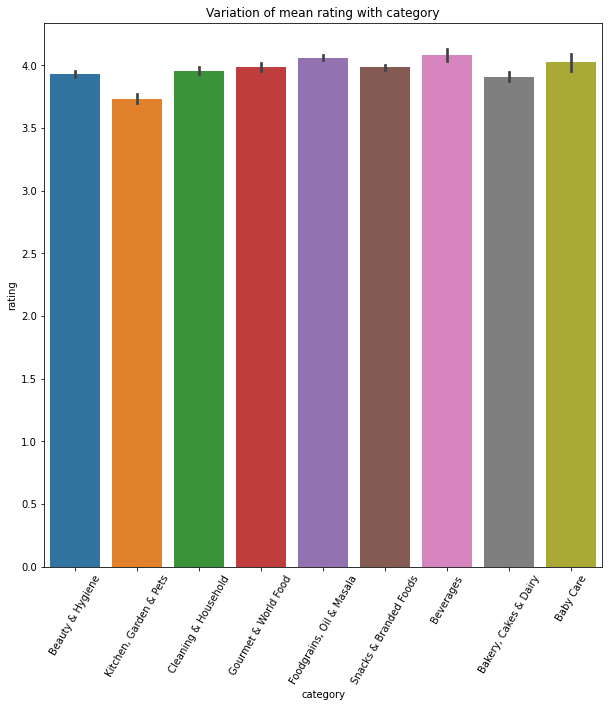

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x=df1['category'], y=df1['rating'])
plt.xlabel("category")
plt.title("Variation of mean rating with category")
plt.xticks(rotation = 60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Beauty & Hygiene'),
  Text(1, 0, 'Kitchen, Garden & Pets'),
  Text(2, 0, 'Cleaning & Household'),
  Text(3, 0, 'Gourmet & World Food'),
  Text(4, 0, 'Foodgrains, Oil & Masala'),
  Text(5, 0, 'Snacks & Branded Foods'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Bakery, Cakes & Dairy'),
  Text(8, 0, 'Baby Care')])

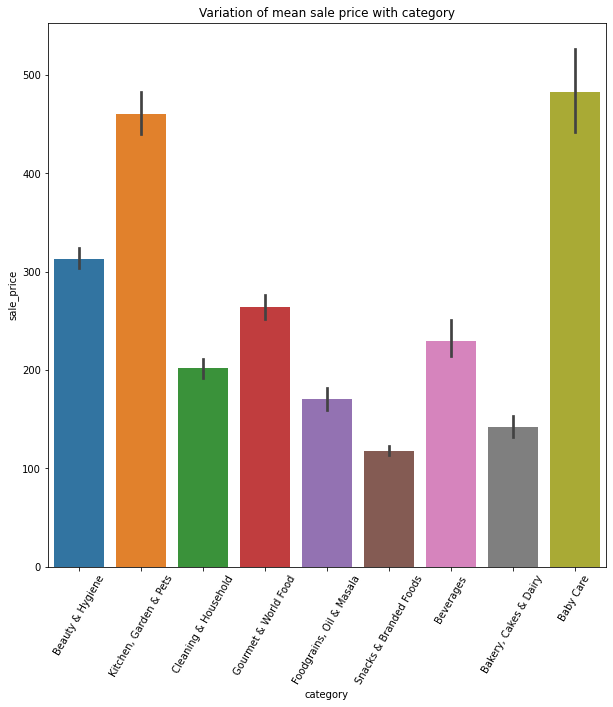

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(x=df1['category'], y=df1['sale_price'])
plt.xlabel("category")
plt.title("Variation of mean sale price with category")
plt.xticks(rotation = 60)

# What does the customer rating look like and is it skewed?

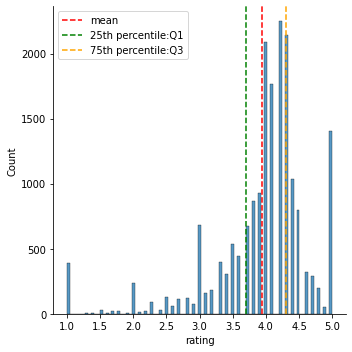

In [12]:
sns.displot(df1['rating'])
plt.axvline(x=np.mean(df1['rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df1['rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df1['rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

The graph of rating displays a slight negative skew.

# To check whether the sale price and category vary with the rating of the item we perform ANOVAs.

In [13]:
model = ols('rating ~ C(category)', data=df1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(category),165.972329,8.0,38.584027,1.943145e-61
Residual,10172.702175,18919.0,NaN,NaN


Since the p-value is much lesser than 0.05 we can reject the null hypothesis i.e. we can say that the rating of the product does vary with category.

In [14]:
model = ols('rating ~ C(sale_price)', data=df1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(sale_price),1787.490017,2446.0,1.40846,9.805353e-32
Residual,8551.184487,16481.0,NaN,NaN


Since the p-value is much lesser than 0.05 we can reject the null hypothesis i.e. we can say that the rating of the product does vary with sale price.

# We add a relevant column "Discount"

In [15]:
df1["discount"] = 100 * (df1['market_price'] - df1["sale_price"])/df1["market_price"]
df1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,category,sale_price,market_price,rating,discount
0,Beauty & Hygiene,220.0,220.0,4.1,0.000000
1,"Kitchen, Garden & Pets",180.0,180.0,2.3,0.000000
2,Cleaning & Household,119.0,250.0,3.4,52.400000
3,Cleaning & Household,149.0,176.0,3.7,15.340909
4,Beauty & Hygiene,162.0,162.0,4.4,0.000000


# Next we perform correlation analysis on the concerned attributes.

<AxesSubplot:>

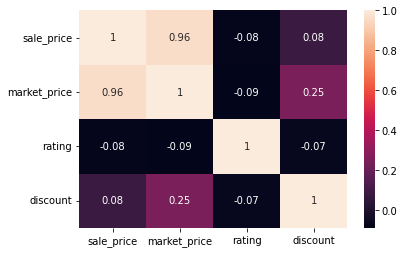

In [16]:
sns.heatmap(np.round(df1.corr(),2), annot=True)

In [17]:
corr, _ = pearsonr(df1["rating"], df1["sale_price"])
corr

-0.0792820446662662

There is no linear correlation here.

In [18]:
coef, p = spearmanr(df1["rating"], df1["sale_price"])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % coef)
else:
	print('Samples are correlated (reject H0) p=%.3f' % coef)

Spearmans correlation coefficient: -0.049
Samples are correlated (reject H0) p=-0.049


In [19]:
coef, p = spearmanr(df1["rating"], df1["category"])
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % coef)
else:
	print('Samples are correlated (reject H0) p=%.3f' % coef)

Spearmans correlation coefficient: -0.057
Samples are correlated (reject H0) p=-0.057


<AxesSubplot:>

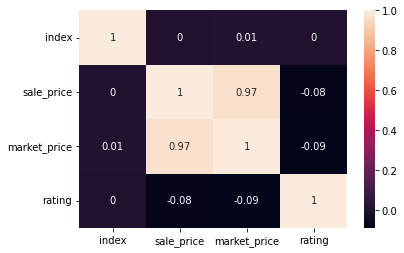

In [20]:
sns.heatmap(np.round(df.corr(),2), annot=True)

#Inferencing conclusions from EDA

# What category should bigbasket focus on selling?

([<matplotlib.axis.XTick at 0x7f841d3ce090>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

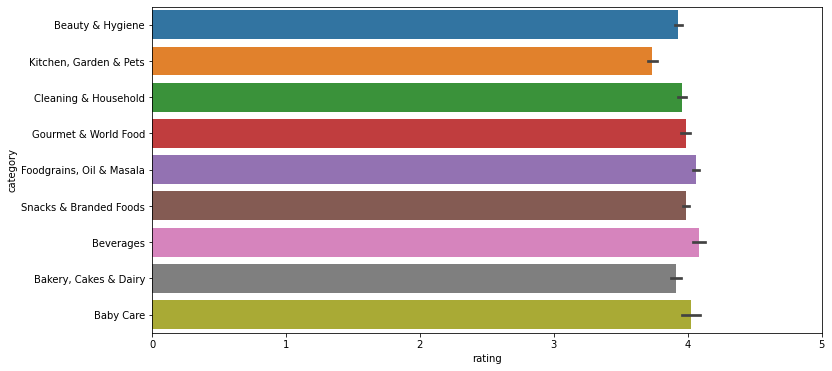

In [21]:
xdata = [0,1,2,3,4,5]
plt.figure(figsize = (12,6))
sns.barplot(y = df1['category'], x = df1['rating'])
plt.xticks(xdata)

Clearly, BigBasket should focus more on selling Foodgrains, Oil & Masala items than Kitchen, Garden & Pets items

# Modeling

Owing to the presence of a categorical independent variable "Category", we set dummy variables while attempting a regression model.

In [22]:
df_dummy = pd.get_dummies(df1["category"])
df2 = pd.concat([df1,df_dummy], axis = 1)
df2.drop(["category"], inplace = True, axis = 1)
df2.head()

,sale_price,market_price,rating,discount,Baby Care,"Bakery, Cakes & Dairy",Beauty & Hygiene,Beverages,Cleaning & Household,"Foodgrains, Oil & Masala",Gourmet & World Food,"Kitchen, Garden & Pets",Snacks & Branded Foods
0,220.0,220.0,4.1,0.000000,0,0,1,0,0,0,0,0,0
1,180.0,180.0,2.3,0.000000,0,0,0,0,0,0,0,1,0
2,119.0,250.0,3.4,52.400000,0,0,0,0,1,0,0,0,0
3,149.0,176.0,3.7,15.340909,0,0,0,0,1,0,0,0,0
4,162.0,162.0,4.4,0.000000,0,0,1,0,0,0,0,0,0


We can now drop either of sale price or market price column as they are highly correlated and we have made a discount column regardless.

In [23]:
df2.drop(["market_price"], inplace = True, axis = 1)
df2.head()

,sale_price,rating,discount,Baby Care,"Bakery, Cakes & Dairy",Beauty & Hygiene,Beverages,Cleaning & Household,"Foodgrains, Oil & Masala",Gourmet & World Food,"Kitchen, Garden & Pets",Snacks & Branded Foods
0,220.0,4.1,0.000000,0,0,1,0,0,0,0,0,0
1,180.0,2.3,0.000000,0,0,0,0,0,0,0,1,0
2,119.0,3.4,52.400000,0,0,0,0,1,0,0,0,0
3,149.0,3.7,15.340909,0,0,0,0,1,0,0,0,0
4,162.0,4.4,0.000000,0,0,1,0,0,0,0,0,0


# We now attempt to make an MLR model.

In [24]:
y = df2.iloc[:,[1]] # rating
x = df2.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]] #remaining columns


In [25]:
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     38.88
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.53e-76
Time:                        16:08:16   Log-Likelihood:                -20942.
No. Observations:               18928   AIC:                         4.191e+04
Df Residuals:                   18917   BIC:                         4.199e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
sale_price              

To check for multicollinearity, we calculate the VIF values for all columns.


In [26]:
X = df2.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
9,1.666173,"Kitchen, Garden & Pets"
4,1.539421,Beauty & Hygiene
1,1.174131,discount
8,1.104751,Gourmet & World Food
6,1.103807,Cleaning & Household
0,1.098214,sale_price
7,1.096549,"Foodgrains, Oil & Masala"
2,1.056409,Baby Care
10,1.040090,Snacks & Branded Foods
5,1.030441,Beverages


The R-squared error is quite low, and there appear to be no varibles with multicollinearity, so this might prove to be a viable model.

We now attempt prediction.

In [27]:
y = df2.iloc[:,[1]] # rating
x = df2.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]] #remaining columns

Splitting into train and test set

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

X_train: (15142, 11)
X_test: (3786, 11)
Y_train: (15142, 1)
Y_test: (3786, 1)


Training the model


In [29]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

Prediction and Evaluation of the model

In [30]:
y_pred=linreg.predict(x_test)

#first 20 results

In [31]:
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))




mape = mean_absolute_error(y_test, y_pred)*100

print("MAE : " + str(mape/100))

MSE: 0.540
MAE : 0.49256260894541115


### As is evident, the accuracy of the Linear model is extremely low. We attempt a Lasso regressive model.


In [32]:
lasso=Lasso(alpha = 0.001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001)

In [33]:
y_pred=lasso.predict(x_test)
y_pred[:20]

array([4.04095306, 3.74838159, 3.9784221 , 3.94053874, 3.94254936,
       3.99245467, 4.0401096 , 3.91929507, 4.07724728, 3.98683039,
       3.92825026, 4.09587811, 3.91356391, 3.9756651 , 4.00348266,
       3.95242992, 3.95308749, 4.07614351, 3.9756651 , 3.95630799])

In [34]:
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))




mape = mean_absolute_error(y_test, y_pred)*100

print("MAE : " + str(mape/100))

MSE: 0.540
MAE : 0.4925470852561415


### The accuracy has not shown much improvement. We now attempt a Ridge regression.

In [35]:
pipeline = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
pipeline.fit(x_train, y_train)
y_train_pred = pipeline.predict(x_train)
y_test_pred = pipeline.predict(x_test)

In [36]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                mean_squared_error(y_test, y_test_pred)))




mape = mean_absolute_error(y_test, y_test_pred)*100
print("MAPE : " +str(mape))

MSE train: 0.534, test: 0.540
MAPE : 49.2512114685379


### Clearly, the MSE of the Ridge model is very low which is a huge improvement. Thus, among regression models, the Ridge model appears to be most viable.

## Decision tree model


In [37]:
y = df2.iloc[:,[1]] # rating
x = df2.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]] #remaining columns
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [38]:


print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))




mape = mean_absolute_error(y_test, y_pred)*100

print("MAE : " + str(mape/100))

MSE: 0.710
MAE : 0.5515917687253344


### Decision trees are clearly unviable in this scenario.

# ANN

In [39]:
y = df2.iloc[:,[1]] # rating
x = df2.iloc[:,[0,2,3,4,5,6,7,8,9,10,11]] #remaining columns
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [40]:
#Initialising ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

# Change these parameters

2022-11-18 16:08:19.639979: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [41]:
ann.fit(x_train,y_train,batch_size=32,epochs = 10)


2022-11-18 16:08:19.835800: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
474/474 [==============================] - 1s 1ms/step - loss: -6.5618 - accuracy: 0.0158
Epoch 2/10
474/474 [==============================] - 1s 1ms/step - loss: -208.3726 - accuracy: 0.0198
Epoch 3/10
474/474 [==============================] - 1s 1ms/step - loss: -1104.1604 - accuracy: 0.0198
Epoch 4/10
474/474 [==============================] - 1s 1ms/step - loss: -3181.0916 - accuracy: 0.0198
Epoch 5/10
474/474 [==============================] - 1s 1ms/step - loss: -6616.7061 - accuracy: 0.0198
Epoch 6/10
474/474 [==============================] - 1s 2ms/step - loss: -11540.7568 - accuracy: 0.0198
Epoch 7/10
474/474 [==============================] - 1s 1ms/step - loss: -18055.9258 - accuracy: 0.0198
Epoch 8/10
474/474 [==============================] - 1s 1ms/step - loss: -26242.5938 - accuracy: 0.0198
Epoch 9/10
474/474 [==============================] - 1s 1ms/step - loss: -36184.8750 - accuracy: 0.0198
Epoch 10/10
474/474 [==============================] - 1s 1ms/st

In [42]:
y_pred = ann.predict(x_test)
Accuracy=r2_score(y_test,y_pred)*100

print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))



mape = mean_absolute_error(y_test, y_pred)*100

print("MAE : " + str(mape/100))

MSE: 9.269
MAE : 2.9526941362916004


# Hence we conclude that the most viable model is the Lasso Regressive model